Se realizarán algunos análisis sobre el dataset de los pasajeros del titanic.

In [14]:
import pandas as pd
# cufflinks permite graficar con el backend plotly directamente desde los dataframes de pandas
import cufflinks as cf 
cf.set_config_file(theme='pearl', sharing='public', offline=True) 

El fichero titanic.csv contiene información sobre los pasajeros del Titanic. Escribir un programa con los siguientes requisitos:

Generar un DataFrame con los datos del fichero.

Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas

Mostrar por pantalla los datos del pasajero con identificador 148.

Mostrar por pantalla las filas pares del DataFrame.

Mostrar por pantalla los nombres de las personas que iban en primera clase ordenadas alfabéticamente.

Mostrar por pantalla el porcentaje de personas que sobrevivieron y murieron.

Mostrar por pantalla el porcentaje de personas que sobrevivieron en cada clase.

Eliminar del DataFrame los pasajeros con edad desconocida.

Mostrar por pantalla la edad media de las mujeres que viajaban en cada clase.

Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.

Mostrar por pantalla el porcentaje de menores y mayores de edad que sobrevivieron en cada clase.

En el dataset de Titanic las variables disponibles son:

PassengerId: identificador único del pasajero.

Survived: si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). Esta es la variable respuesta que interesa predecir.

Pclass: clase a la que pertenecía el pasajero: 1, 2 o 3.

Name: nombre del pasajero.

Sex: sexo del pasajero.

Age: edad del pasajero.

SibSp: número de hermanos, hermanas, hermanastros o hermanastras en el barco.

Parch: número de padres e hijos en el barco.

Ticket: identificador del billete.

Fare: precio pagado por el billete.

Cabin: identificador del camarote asignado al pasajero.

Embarked: puerto en el que embarcó el pasajero.

In [15]:
# Generar un DataFrame con los datos del fichero.
titanic = pd.read_csv('titanic.csv', index_col=0)

In [24]:
# Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas.
print('Dimensiones:', titanic.shape)
print('Número de elemntos:', titanic.size)
print('Nombres de columnas:', titanic.columns)
print('Nombres de filas:', titanic.index)
print('Tipos de datos:\n', titanic.dtypes)
display('Primeras 10 filas:\n', titanic.head(10))
display('Últimas 10 filas:\n', titanic.tail(10))

Dimensiones: (891, 11)
Número de elemntos: 9801
Nombres de columnas: Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Nombres de filas: Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)
Tipos de datos:
 Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


'Primeras 10 filas:\n'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


'Últimas 10 filas:\n'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Usar la función de agrupamiento

In [33]:
media_por_sexo = titanic.groupby(['Sex','Survived'])['Age'].max()
display(media_por_sexo)

Sex     Survived
female  0           57.0
        1           63.0
male    0           74.0
        1           80.0
Name: Age, dtype: float64

In [5]:
cant_filas = titanic.shape[0]
x_filas = list(range(cant_filas))

### Hacer un diagrama de dispersión con cufflinks

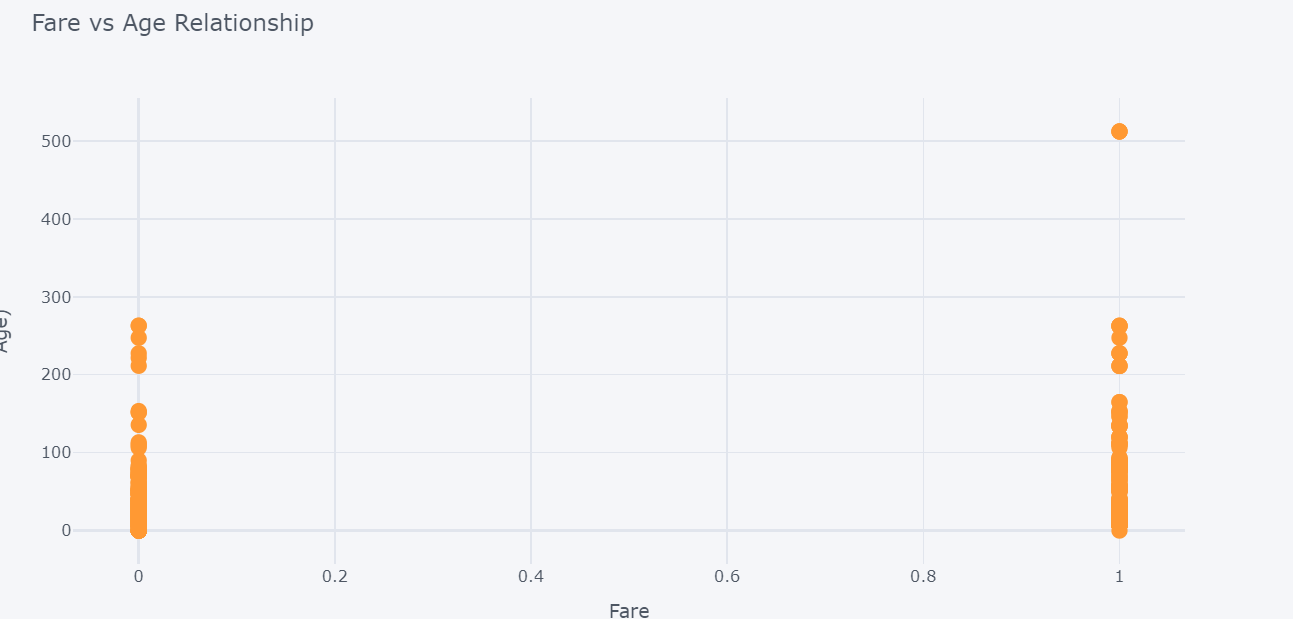

In [49]:
(titanic[(titanic['Age']>50) & (titanic['Pclass']==1)])["Age"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",xTitle='Ages', yTitle='Count')

In [50]:
titanic.iplot(kind="scatter",
                              x='Pclass', y='Fare',
                              mode='markers',
                              xTitle="Fare", yTitle="Age)",
                              title="Fare vs Age Relationship")

In [23]:
titanic.corr().iplot(kind='heatmap',colorscale="Blues",title="Feature Correlation Matrix")

C:\Users\r\AppData\Local\Temp\ipykernel_14836\3150496029.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [22]:
titanic["Age"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",xTitle='Ages', yTitle='Count')

In [12]:
titanic.groupby('Sex')['Age'].count()

Sex
female    261
male      453
Name: Age, dtype: int64